In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# Input File (CSV) and initialize the yelp data
input_data_file = "resources/yelp_clean.csv"
df = pd.read_csv(input_data_file)
df.head()

,restaurant,address,recent_health_score,recent_health_risk,average_health_score,zipcode,yelp_business_id,rating,price,review_count,category_1,category_2,category_3,distance,cuisine
0,Norman's Ice Cream and Freezes,2801 Leavenworth St,96,Low Risk,96.000000,94133.0,sfAIpzEC8ywpy36YhzikmQ,4.5,$,289.0,Ice Cream & Frozen Yogurt,Coffee & Tea,Juice Bars & Smoothies,8.031888,Other
1,CHARLIE'S DELI CAFE,3202 FOLSOM St,88,Low Risk,86.315789,94117.0,hNze7c3mWvEnAXYT_geV9Q,4.5,$,82.0,Delis,Sandwiches,NaN,11.894793,Other
2,ART'S CAFE,747 IRVING St,94,Low Risk,90.500000,94122.0,MXKWFQHoC0SXy9UI-Djn7g,4.0,$,1069.0,Diners,Korean,American (Traditional),8.885345,Other
3,CAFE X + O,1799 Church St,92,Low Risk,91.750000,94131.0,HhAmBwTYq_MXbOLzypRQjQ,3.5,$,223.0,Coffee & Tea,Sandwiches,NaN,7.502404,Other
4,Oasis Grill,91 Drumm St,70,Low Risk,72.454545,94111.0,gBRjRvIfA4fIo6pNebTjuA,4.0,$$,1199.0,Mediterranean,Desserts,Salad,5.072415,Mediterranean


In [5]:
# organize data for ANOVA testing
american = df.loc[(df["cuisine"] == "American")]
chinese = df.loc[(df["cuisine"] == "Chinese")]
indian = df.loc[(df["cuisine"] == "Indian")]
italian = df.loc[(df["cuisine"] == "Italian")]
japanese = df.loc[(df["cuisine"] == "Japanese")]
korean = df.loc[(df["cuisine"] == "Korean")]
mediterranean = df.loc[(df["cuisine"] == "Mediterranean")]
mexican = df.loc[(df["cuisine"] == "Mexican")]
other = df.loc[(df["cuisine"] == "Other")]
thai = df.loc[(df["cuisine"] == "Thai")]
vietnamese = df.loc[(df["cuisine"] == "Vietnamese")]
box_data = [american["average_health_score"], chinese["average_health_score"], indian["average_health_score"], 
           italian["average_health_score"], japanese["average_health_score"], korean["average_health_score"],
           mediterranean["average_health_score"], mexican["average_health_score"],
           thai["average_health_score"], vietnamese["average_health_score"], other["average_health_score"]]

In [6]:
# How do we know if any of the cuisines are statistically different?
# Perform the ANOVA
stats.f_oneway(american["average_health_score"], chinese["average_health_score"], indian["average_health_score"], 
           italian["average_health_score"], japanese["average_health_score"], korean["average_health_score"],
           mediterranean["average_health_score"], mexican["average_health_score"],
           thai["average_health_score"], vietnamese["average_health_score"])

F_onewayResult(statistic=23.541522717318838, pvalue=4.4140406840675405e-37)

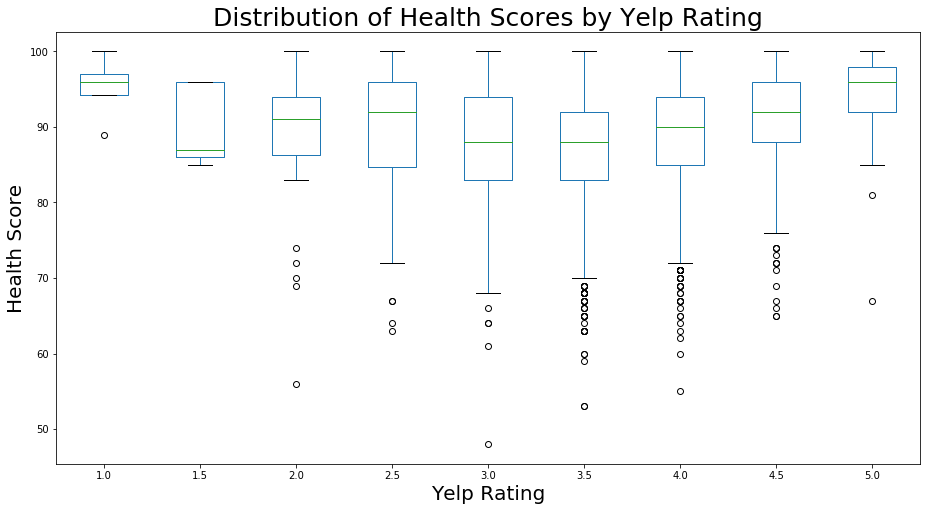

In [7]:
rating = df.boxplot("recent_health_score", by="rating", figsize=(15, 8), grid=False)
rating.set_xlabel("Yelp Rating", fontsize=20)
rating.set_ylabel("Health Score", fontsize=20)
rating.set_title("Distribution of Health Scores by Yelp Rating", fontsize=25)
plt.suptitle("")
plt.savefig("figures/rating_boxplot.png")

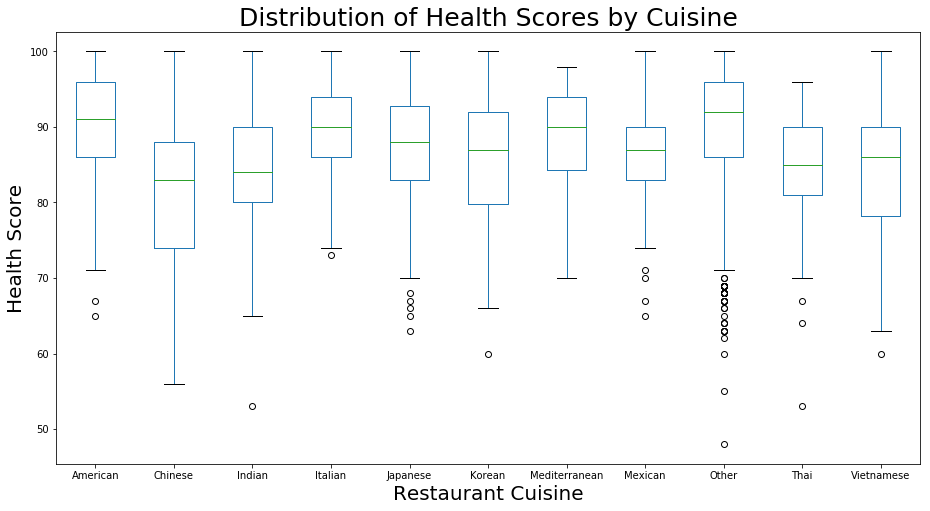

In [8]:
cuisine = df.boxplot("recent_health_score", by="cuisine", figsize=(15, 8), grid=False)
cuisine.set_xlabel("Restaurant Cuisine", fontsize=20)
cuisine.set_ylabel("Health Score", fontsize=20)
cuisine.set_title("Distribution of Health Scores by Cuisine", fontsize=25)
plt.suptitle("")
plt.savefig("figures/cuisine_boxplot.png")

In [ ]:
#
#num_reviews = df.boxplot("recent_health_score", by="cuisine", figsize=(15, 8), grid=False)
#num_reviews.set_xlabel("Number of Reviews", fontsize=20)
#num_reviews.set_ylabel("Health Score", fontsize=20)
#num_reviews.set_title("Distribution of Health Scores by Number of Reviews", fontsize=25)
#plt.suptitle("")
#plt.savefig("num_reviews_boxplot.png")